<a href="https://colab.research.google.com/github/Rmukherjee161003/CodeAlpha_Machine_Learning/blob/main/CodeAlphaTask_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/CARDIO_Disease.csv")
df

,uid,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


df.shape

In [ ]:
df.head()

,uid,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.tail()

,uid,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
df.columns

Index(['uid', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.isnull().sum()

,0
uid,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
df = df.drop(columns=['uid'])

In [ ]:
columns = ['age', 'height','weight','ap_hi','ap_lo']

for i in columns:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    norm_range = (q3 - q1) * 1.5

    lower_outliers = df[df[i] < (q1 - norm_range)]

    upper_outliers = df[df[i] > (q3 + norm_range)]

    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

    df[i] = np.where(df[i] < (q1 - norm_range), q1 - norm_range, df[i])
    df[i] = np.where(df[i] > (q3 + norm_range), q3 + norm_range, df[i])

The number of outliers in age: 4
The number of outliers in height: 519
The number of outliers in weight: 1819
The number of outliers in ap_hi: 1435
The number of outliers in ap_lo: 4632


In [ ]:
columns = ['age', 'height','weight','ap_hi','ap_lo']

for i in columns:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    norm_range = (q3 - q1) * 1.5

    lower_outliers = df[df[i] < (q1 - norm_range)]

    upper_outliers = df[df[i] > (q3 + norm_range)]

    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

The number of outliers in age: 0
The number of outliers in height: 0
The number of outliers in weight: 0
The number of outliers in ap_hi: 0
The number of outliers in ap_lo: 0


In [ ]:
df.duplicated().sum()

np.int64(24)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(69976, 12)

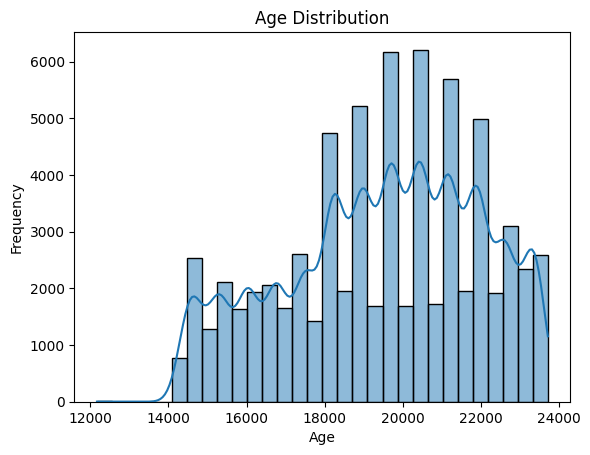

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

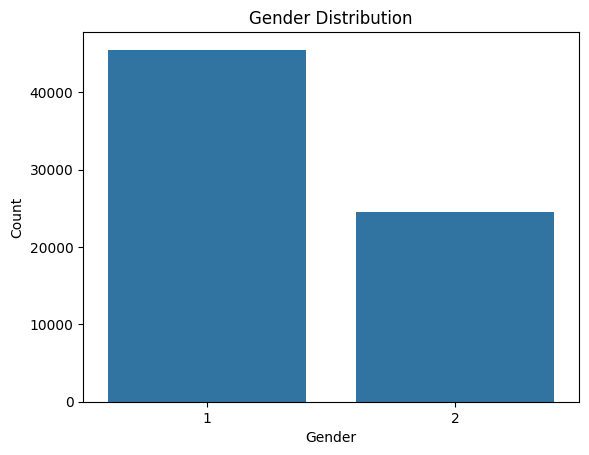

In [ ]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

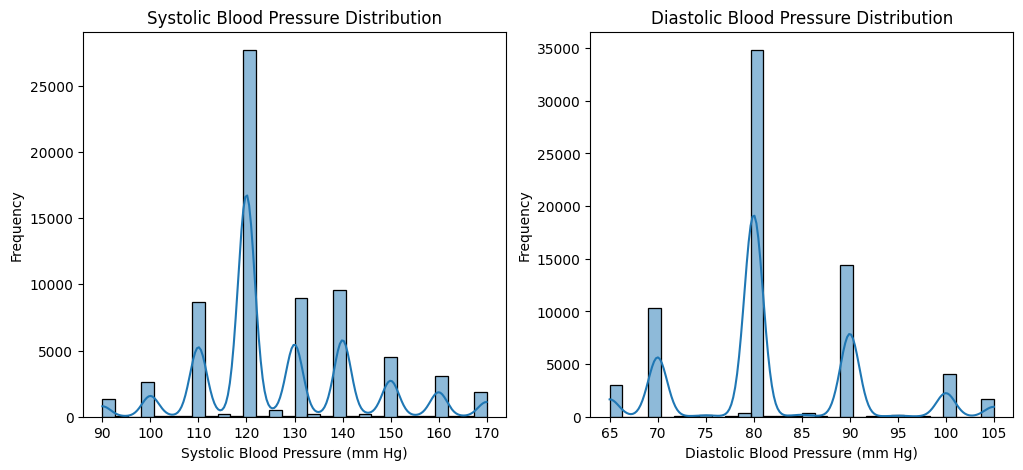

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['ap_hi'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Systolic Blood Pressure Distribution')
ax[0].set_xlabel('Systolic Blood Pressure (mm Hg)')
ax[0].set_ylabel('Frequency')

sns.histplot(df['ap_lo'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Diastolic Blood Pressure Distribution')
ax[1].set_xlabel('Diastolic Blood Pressure (mm Hg)')
ax[1].set_ylabel('Frequency')

plt.show()

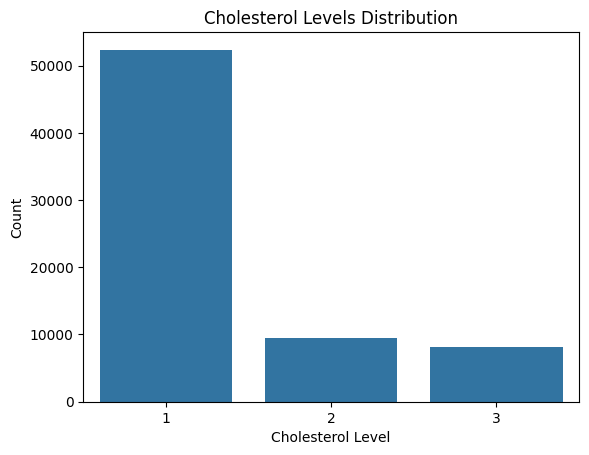

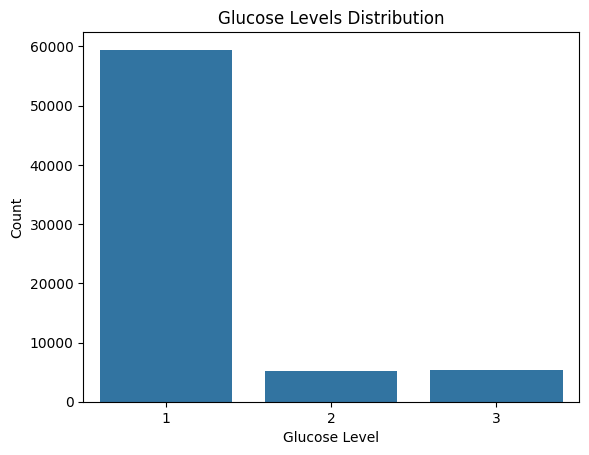

In [ ]:
sns.countplot(x='cholesterol', data=df)
plt.title('Cholesterol Levels Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

sns.countplot(x='gluc', data=df)
plt.title('Glucose Levels Distribution')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.show()

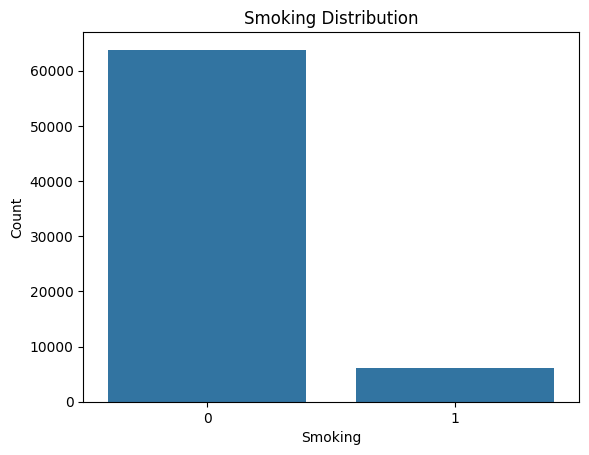

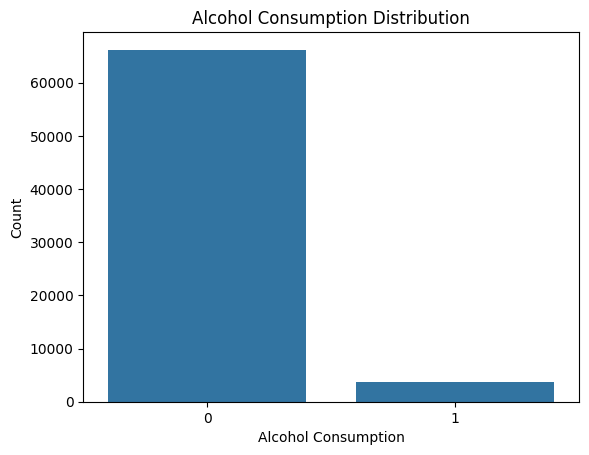

In [ ]:
sns.countplot(x='smoke', data=df)
plt.title('Smoking Distribution')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

sns.countplot(x='alco', data=df)
plt.title('Alcohol Consumption Distribution')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Count')
plt.show()

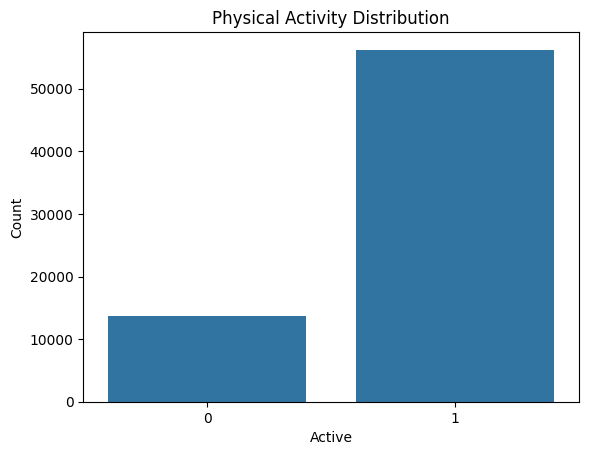

In [ ]:
sns.countplot(x='active', data=df)
plt.title('Physical Activity Distribution')
plt.xlabel('Active')
plt.ylabel('Count')
plt.show()

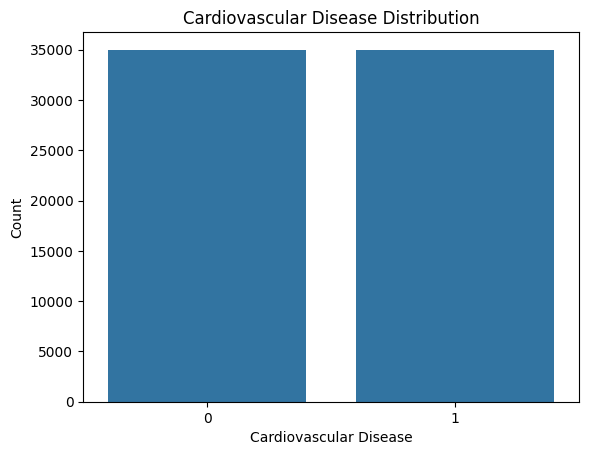

In [ ]:
sns.countplot(x='cardio', data=df)
plt.title('Cardiovascular Disease Distribution')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Count')
plt.show()

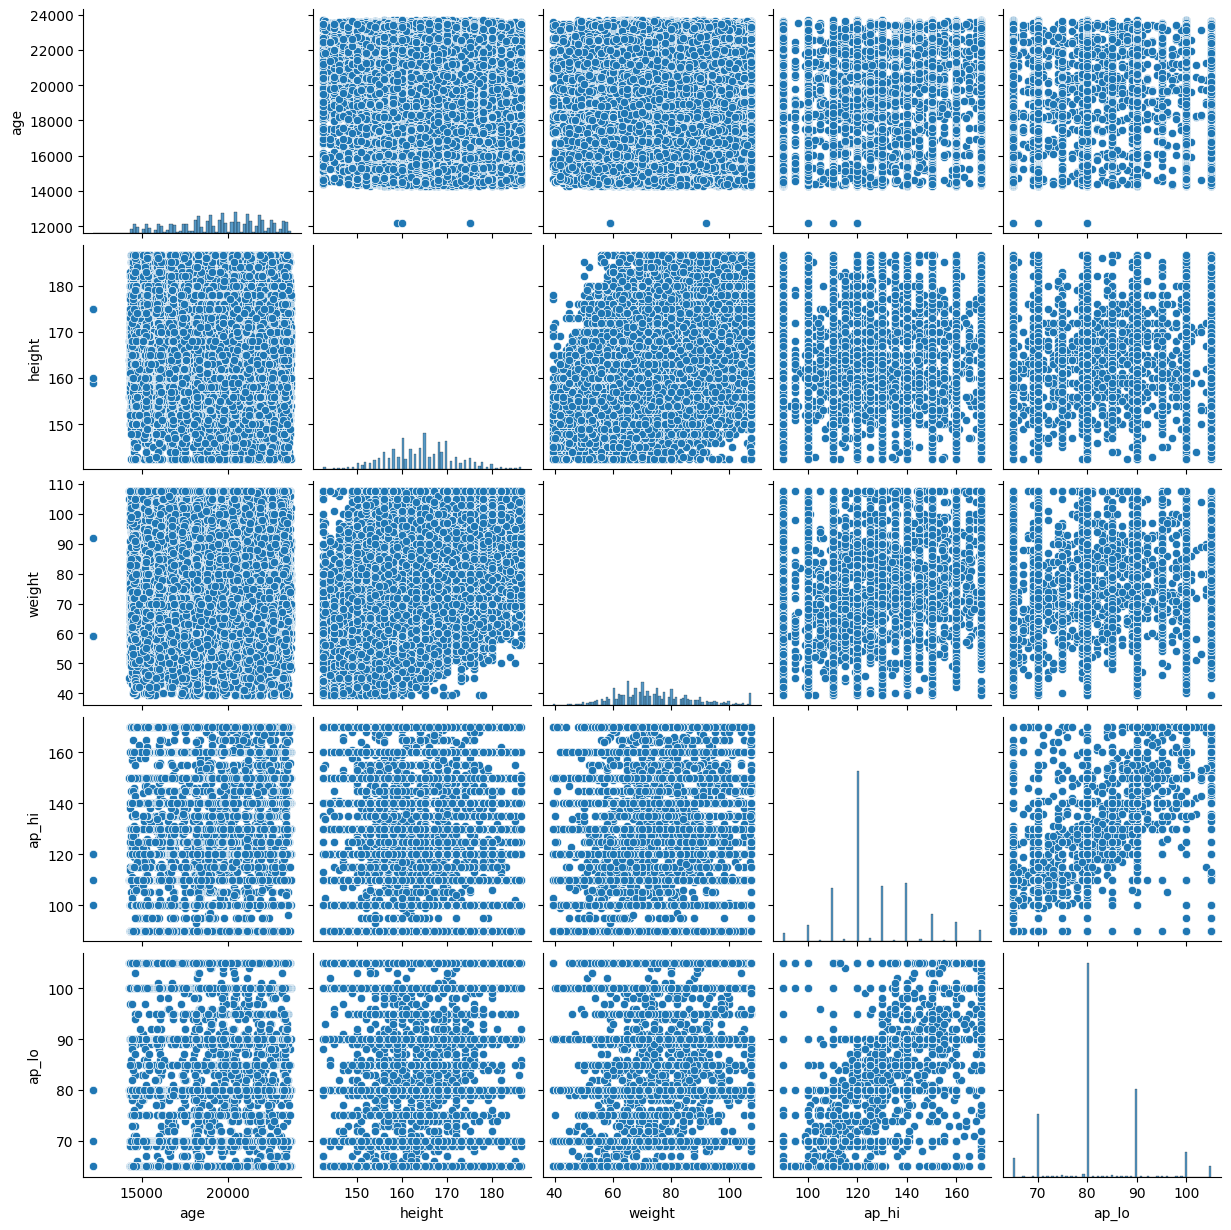

In [ ]:
sns.pairplot(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.show()

In [ ]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022771,-0.086512,0.059584,0.209299,0.155773,0.154431,0.098702,-0.047664,-0.029745,-0.009904,0.238182
gender,-0.022771,1.000000,0.521919,0.162774,0.061674,0.067047,-0.035915,-0.020558,0.338131,0.170950,0.005917,0.008037
height,-0.086512,0.521919,1.000000,0.316633,0.016544,0.030475,-0.054584,-0.020682,0.196199,0.097959,-0.008228,-0.012382
weight,0.059584,0.162774,0.316633,1.000000,0.274111,0.258866,0.143894,0.105738,0.068665,0.068227,-0.017443,0.185374
ap_hi,0.209299,0.061674,0.016544,0.274111,1.000000,0.725653,0.197327,0.092647,0.027236,0.032440,0.002062,0.435388
ap_lo,0.155773,0.067047,0.030475,0.258866,0.725653,1.000000,0.165979,0.075741,0.026962,0.040681,0.001595,0.356277
cholesterol,0.154431,-0.035915,-0.054584,0.143894,0.197327,0.165979,1.000000,0.451539,0.010298,0.035718,0.009927,0.221119
gluc,0.098702,-0.020558,-0.020682,0.105738,0.092647,0.075741,0.451539,1.000000,-0.004799,0.011214,-0.006761,0.089268
smoke,-0.047664,0.338131,0.196199,0.068665,0.027236,0.026962,0.010298,-0.004799,1.000000,0.340077,0.025870,-0.015533
alco,-0.029745,0.170950,0.097959,0.068227,0.032440,0.040681,0.035718,0.011214,0.340077,1.000000,0.025486,-0.007366


<Axes: >

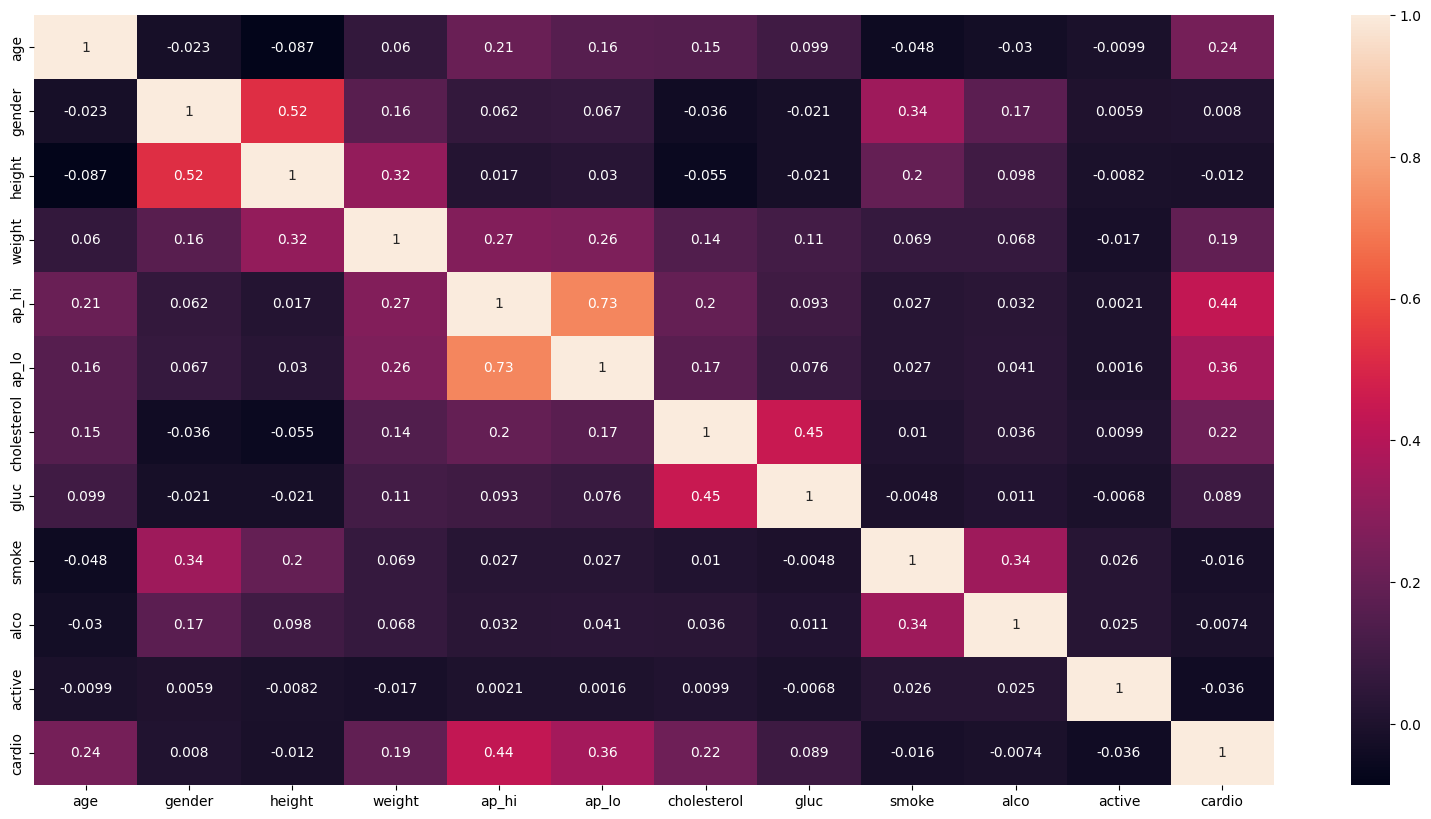

In [ ]:
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True)

In [ ]:
high_corr = []
low_corr = []
bad_corr = []
for col in df.columns:
  relation = df['cardio'].corr(df[col])
  if(relation > 0):
    if relation >= 0.7 and relation <= 1 :

      high_corr.append(col)
    elif relation >= 0.4 and relation < 0.7 :

      low_corr.append(col)
    else: bad_corr.append(col)
  else:
    if relation <= -0.7 and relation > -1 :

      high_corr.append(col)
    elif relation <= -0.4 and relation > -0.7 :

      low_corr.append(col)
    else: bad_corr.append(col)

print(f"the high corr are {high_corr}")
print(f"the low corr are {low_corr}")
print(f"the bad corr are {bad_corr}")

the high corr are ['cardio']
the low corr are ['ap_hi']
the bad corr are ['age', 'gender', 'height', 'weight', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


In [ ]:
x = df.drop('cardio',axis=1)
y = df['cardio']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
compare = pd.DataFrame(columns=['Actual','Prediction'])

compare['Actual'] = y_test
compare['Prediction'] = y_pred

In [ ]:
compare['Prediction'] = compare['Prediction'].map({0:'no',1:'yes'})
compare['Actual'] = compare['Actual'].map({0:'no',1:'yes'})

In [ ]:
compare.head(100)

,Actual,Prediction
25521,no,no
34513,no,no
69595,no,no
56818,no,no
47712,no,no
...,...,...
12322,yes,no
43990,yes,yes
24376,yes,no
13808,no,no


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)

print("Accuracy:", acc*100, "%")
print("Precision:",prec*100,"%")

Accuracy: 71.64189768505287 %
Precision: 72.52245619201885 %


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7007716490425836
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      6968
           1       0.72      0.66      0.69      7028

    accuracy                           0.70     13996
   macro avg       0.70      0.70      0.70     13996
weighted avg       0.70      0.70      0.70     13996



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7279222635038582
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6968
           1       0.76      0.67      0.71      7028

    accuracy                           0.73     13996
   macro avg       0.73      0.73      0.73     13996
weighted avg       0.73      0.73      0.73     13996

